# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from project_paths import RATES_FINAL

# Load data

In [2]:
df = pd.read_parquet(RATES_FINAL)

# Look at the data

In [3]:
df.head()

,date,EUR_DKK,EUR_DKK__cross_USD,EUR_DKK__cross_GBP,EUR_DKK__cross_JPY,USD_DKK,GBP_DKK,JPY_DKK,EUR_USD,EUR_GBP,EUR_JPY
0,2019-03-01,7.4613,7.461329,7.461335,7.461309,6.5548,8.6792,0.058589,1.1383,0.85968,127.35
1,2019-03-04,7.4616,7.461560,7.461567,7.461547,6.5816,8.6990,0.058794,1.1337,0.85775,126.91
2,2019-03-05,7.4614,7.461393,7.461418,7.461419,6.5861,8.6401,0.058844,1.1329,0.86358,126.80
3,2019-03-06,7.4609,7.460848,7.460906,7.460886,6.5996,8.6785,0.059026,1.1305,0.85970,126.40
4,2019-03-07,7.4610,7.460951,7.460997,7.460951,6.6196,8.6877,0.059228,1.1271,0.85880,125.97


# Ad-hoc analysis: when historically and which cross-rate was the most distant from direct rate

In [4]:
MAX_CROSS_DIFF = {
    "cross_USD": max(abs(df["EUR_DKK"] - df["EUR_DKK__cross_USD"])),
    "cross_GBP": max(abs(df["EUR_DKK"] - df["EUR_DKK__cross_GBP"])),
    "cross_JPY": max(abs(df["EUR_DKK"] - df["EUR_DKK__cross_JPY"])),
}
MAX_CROSS_DIFF["overall_value"] = max(MAX_CROSS_DIFF.values())
MAX_CROSS_DIFF["overall_currency"] = "cross_GBP"
MAX_CROSS_DIFF["overall_dates"] = df[abs(df["EUR_DKK"] - df["EUR_DKK__cross_GBP"]) == MAX_CROSS_DIFF["overall_value"]][
    "date"].to_list()
MAX_CROSS_DIFF

{'cross_USD': 9.237499999859011e-05,
 'cross_GBP': 0.00020463850000140837,
 'cross_JPY': 0.0001498900000012071,
 'overall_value': 0.00020463850000140837,
 'overall_currency': 'cross_GBP',
 'overall_dates': [Timestamp('2020-05-01 00:00:00')]}

In [5]:
information = (
    f"in analyzed period highest difference of {MAX_CROSS_DIFF['overall_value']:.4f} "
    f"noted for {MAX_CROSS_DIFF['overall_currency']} "
    f"on {MAX_CROSS_DIFF['overall_dates'][0]:%Y-%m-%d}"
)
information

'in analyzed period highest difference of 0.0002 noted for cross_GBP on 2020-05-01'

# Plots

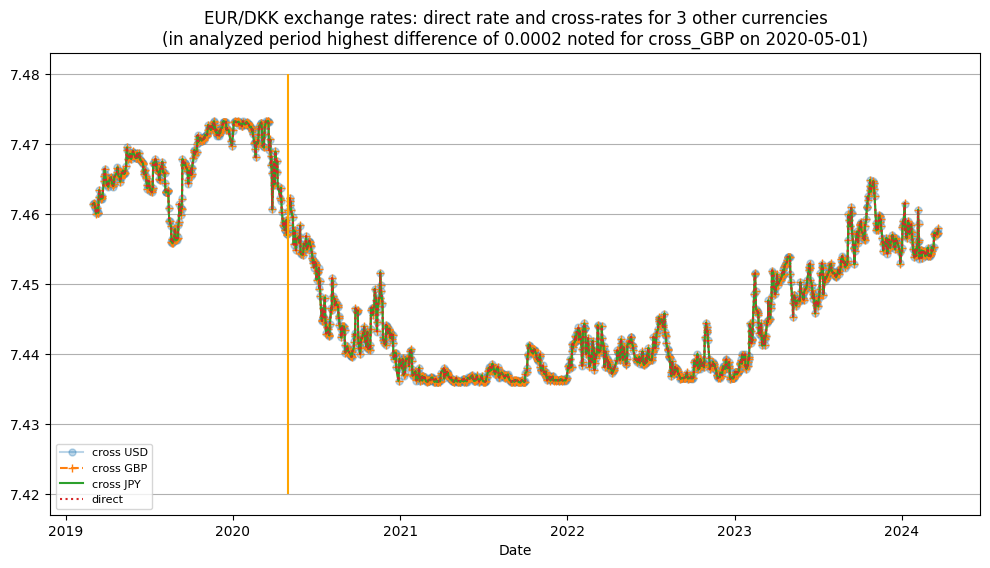

In [6]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(df["date"], df["EUR_DKK__cross_USD"], label='cross USD', linestyle='solid', marker="o", alpha=0.3, markersize=5)
ax.plot(df["date"], df["EUR_DKK__cross_GBP"], label='cross GBP', linestyle='dashed', marker="+")
ax.plot(df["date"], df["EUR_DKK__cross_JPY"], label='cross JPY', linestyle='solid')
ax.plot(df["date"], df["EUR_DKK"], label='direct', linestyle='dotted')
ax.set_xlabel('Date')
ax.legend(fontsize=8, loc="lower left")
plt.title(f"EUR/DKK exchange rates: direct rate and cross-rates for 3 other currencies\n({information})")
plt.vlines(MAX_CROSS_DIFF["overall_dates"], 7.42, 7.48, color="orange")
plt.grid(axis="y")
plt.show()

# Analysis/Answers

In [7]:
# Most appreciated/deprecated
answers = {
    rate: {
        "most_appreciated_on": df[(df[rate] == df[rate].max())]["date"].dt.strftime('%Y-%m-%d').to_list(),
        "most_deprecated_on": df[(df[rate] == df[rate].min())]["date"].dt.strftime('%Y-%m-%d').to_list(),
        "biggest_1DAY_appreciation_on": df[
            ((df[rate] - df[rate].shift(1)) == max((df[rate] - df[rate].shift(1)).fillna(0)))
        ]["date"].dt.strftime('%Y-%m-%d').to_list(),
        "biggest_1DAY_depreciation_on": df[
            ((df[rate] - df[rate].shift(1)) == min((df[rate] - df[rate].shift(1)).fillna(0)))
        ]["date"].dt.strftime('%Y-%m-%d').to_list(),
    }
    for rate in ["EUR_DKK", "USD_DKK", "GBP_DKK", "JPY_DKK"]
}

In [8]:
# Display
pprint(answers)

{'EUR_DKK': {'biggest_1DAY_appreciation_on': ['2020-03-30'],
             'biggest_1DAY_depreciation_on': ['2020-03-27'],
             'most_appreciated_on': ['2019-11-21',
                                     '2019-12-12',
                                     '2020-01-06',
                                     '2020-01-13',
                                     '2020-01-23',
                                     '2020-03-13',
                                     '2020-03-17',
                                     '2020-03-18'],
             'most_deprecated_on': ['2021-09-20']},
 'GBP_DKK': {'biggest_1DAY_appreciation_on': ['2019-10-11'],
             'biggest_1DAY_depreciation_on': ['2020-03-02'],
             'most_appreciated_on': ['2022-03-04'],
             'most_deprecated_on': ['2020-03-23']},
 'JPY_DKK': {'biggest_1DAY_appreciation_on': ['2023-03-15'],
             'biggest_1DAY_depreciation_on': ['2020-03-13'],
             'most_appreciated_on': ['2020-05-06'],
             'mos

In [19]:
# Visual validation check for EUR_DKK
mask__dates = ("2020-03-26" <= df["date"]) & (df["date"] <= "2020-04-01")
df[mask__dates][["date", "EUR_DKK"]]

,date,EUR_DKK
266,2020-03-26,7.4659
267,2020-03-27,7.4606
268,2020-03-30,7.4667
269,2020-03-31,7.4674
270,2020-04-01,7.4642
